# IFSBM UE 12: Big data predictive models

## Lecture: Introduction aux méthodes de machine learning

__Author__: Yoann Pradat, CentraleSupelec (MICS)

__Email__: yoann.pradat@centralesupelec.fr

__Date__: 21/01/2021

## Contents

1. Méthodes générales
2. Modèles linéaires
 1. Régression logistique
 2. Régression linéaire
3. Modèles de survie

In [47]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
%autoreload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#  Local functions
from Lecture_1_utils import *

# Notebook settings
from IPython.core.display import HTML

HTML("""
<style>
.container {
    width: 70% !important;
}
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


## 1. Méthodes générales

__Notations__


- $n, p \in \mathbb{N}^*$ nombre d'observations (unités, individus) et nombre de variables (facteurs, cofacteurs);
- $\mathrm{X}$ variable aléatoire scalaire, $x$ observation de $\mathrm{X}$.
- La police en gras $\mathbf{X}$ utilisée pour dénoter des vecteurs ou matrices
- $\mathbf{X_{1:n}}$ vecteur ou matrice de variables aléatoires formé de $\mathrm{X_1, \ldots, X_n}$
- $\mathbf{x_{1:n}}$ observation de $\mathbf{X_{1:n}}$.

__Objectif__

1. Proposer un modèle mathématique (modèle statistique)
2. Estimer des paramètres optimaux du modèle à partir des données.

### 1.1 Qu'est-ce qu'un modèle statistique?

__Definition 1__(Modèle statistique)

Un modèle statistique est une collection de lois (ou densités) candidates paramétrée par $\theta \in \Theta$
\begin{equation}
    \mathcal{M}_{\Theta} = \{p_{\theta} | \theta \in \Theta\}
\end{equation}

#### Example 1D

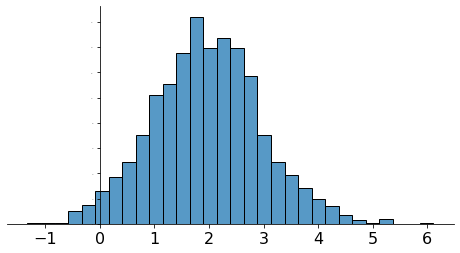

In [17]:
X = make_unknown_1d_data(mu=2, sigma=1)
plot_1d_data(X)

**Ensemble de lois candidates**:

\begin{equation}
    M_{\Theta} = \{\phi_{\mu, \sigma^2}, (\mu, \sigma^2) \in \mathbb{R}\times\mathbb{R}_+\}
\end{equation}

pour modéliser la distribution de $X$.

**Hypothèse**:

Il existe $\theta^* = (\mu^*, (\sigma^2)^*)$ tel que
\begin{equation}
    X \sim \phi_{\theta*}
\end{equation}

L'objectif des procédures d'estimation est **d'estimer** le paramètre optimal (inconnu) $\Theta^*$.

#### Example 2D

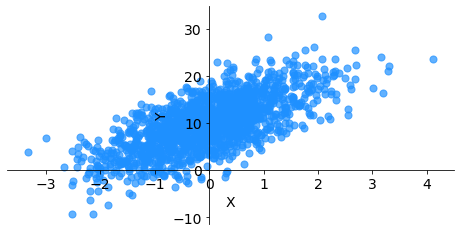

In [43]:
X, Y = make_unknown_2d_data(alpha=10, sigma=4)
plot_2d_data(X, Y)

**Ensemble de lois candidates**:

\begin{equation}
    M_{\Theta} = \{\phi_{\mu, \sigma^2}, (\mu, \sigma^2) \in \mathbb{R}\times\mathbb{R}_+\}
\end{equation}

pour modéliser la distribution conditionelle de $Y|X$.

### 1.2 Estimation par maximum de vraisemblance

Soient $x_1, \cdots, x_n$ des observations de la loi (inconnue) $p_{\theta^*}$. Mathématiquement, on représente les $x_i$ comme des réalisation de variables aléatoires $\mathrm{X}_i$ **indépendantes et identiquement distribuées**.

***

**Intuition** pour modèle supposé $p_{\theta}$, la probabilité d'observer $x_i$ est $\Pr(X_i=x_i) = p_{\theta}(x_i)$.

Sous l'hypothèse d'indépendance, la probabilité d'observer le jeu de données $x_{1:n}$ est

\begin{equation}
    \mathcal{L}(\theta; x_{1:n}) = \prod_{i=1}^n p_{\theta}(x_i)
\end{equation}

On appelle $\mathcal{L}: \theta \mapsto \mathcal{L}(\theta; x_{1:n})$ la **fonction de vraisemblance** de l'échantillon $x_{1:n}$.

***

Quel estimateur pour $\theta^*$? On prend l'estimateur le plus probable pour notre échantillon!

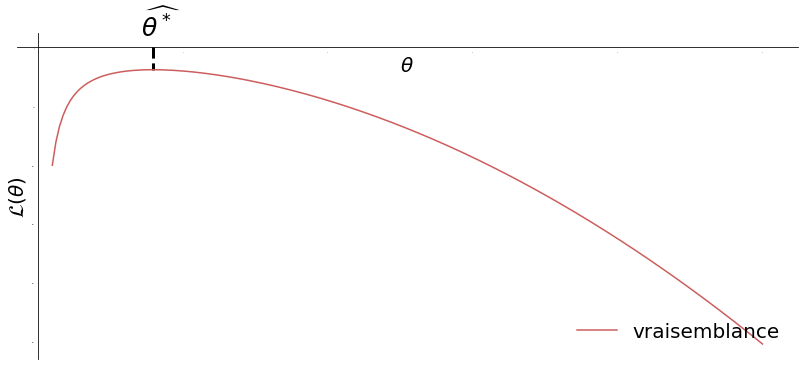

In [21]:
plot_likelihood_principle()

### Exemple d'estimation du paramètre d'une loi de Bernoulli

__Définition 2__ (Bernoulli)

Une loi de Bernoulli est la loi de probabilité d'une expérience ayant une probabilité $\theta=p$ de succès et $1-p$ d'échec. La probabilité d'observer $x \in \{0,1\}$ est donné par
\begin{equation}
    p_\theta(x) = \theta^x (1-\theta)^{1-x}
\end{equation}

__Exemple__

Imaginons que l'on tire une pièces 500 fois. On modèlise les observations par un modèle de Bernoulli (modèle statistique). La vraisemblance de l'échantillon $x_{1:500}$ est
\begin{equation}
    \mathcal{L}(\theta) = \prod_{i=1}^{500} \theta^{x_i} (1-\theta)^{1-x_i}
\end{equation}

En passant au logarithme (même problème de maximisation), on obtient

\begin{equation}
    \log \mathcal{L}(\theta) = \sum_{i=1}^{500} x_i \log \theta + (1-x_i) \log(1-\theta)
\end{equation}

En calculant que $\frac{d \log \mathcal{L}}{d \theta}$ doit être nul au maximum, on obtient comme estimateur
\begin{equation}
    \hat{\theta^*} = \frac{1}{500} \sum_{i=1}^{500} x_i
\end{equation}

## 2. Modèles linéaires

### 2.A La régression logistique

Soient $x_{1:n}, y_{1:n} \sim X, Y$ un échantillon i.i.d d'observations de $X \in \mathbb{R}^p, Y \in \{0,1\}$.

__Exemple__
On mesure les données d'expresssion sur $n$ patients et $p$ gènes. Chaque patient appartient à la classe $0$ ou $1$.

***
__Le modèle__

La régression logistique est un modèle de régression, i.e un modèle statistique sur la loi de $Y$ conditionnellement à $X$.

\begin{equation*}
    \mathcal{M}_{\Theta} = \{ P_{Y|X=x} = \mathcal{B}(\sigma(x^\top \theta)) | \theta \in \mathbb{R}^p\}
\end{equation*}

avec $\sigma$ la fonction logistique.

Autrement dit, à $X_i$ fixé, $Y_i$ est tiré d'une loi de Bernoulli de paramètre $p_i = \sigma(x_i^\top \theta)$

\begin{equation}
     Y_i \sim \mathcal{B}(p_i).
\end{equation}
***

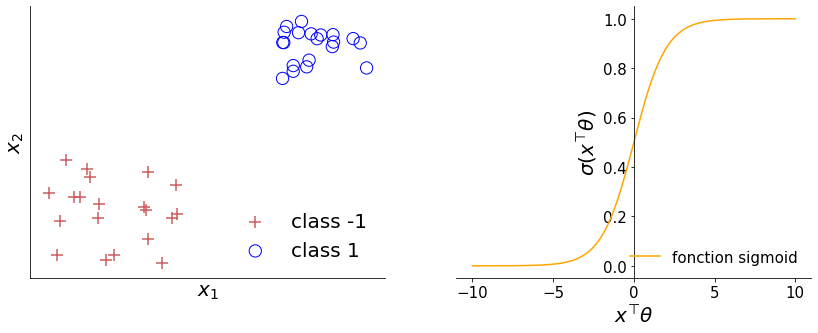

In [26]:
plot_illustrate_logistic()

__Remarque__ 
La régression logistique est un exemple particulier de modèle linéaire généralisé définit par
1. La loi de probabilité **Bernoulli**
2. Le lien entre les prédicteurs $x^\top \theta$ et la loi de probabilité: **sigmoid**
La régression logiques

__En résumé__
1. Les paramètres du modèle à estimer sont $\theta = (\theta_1, \ldots, \theta_p) \in \mathbb{R}^p$.
2. C'est un modèle statistique $\mathcal{M}_{\theta}$ sur la loi $P_{\mathrm{Y}|\mathrm{X}=\mathbf{x}}$ à $x$ fixé.
3. Hypothèses du modèle
    1. Relation linéaire entre $\mathrm{logit} p_{\mathrm{Y}|\mathrm{X}=\mathbf{x}}(1)$ et $x$;


Logit est la fonction $p \to \log(\frac{p}{1-p})$.

### Estimation de $\theta = (\theta_1, \ldots, \theta_p)$

Par maximum de vraisemblance,
\begin{align}
        \mathcal{L}(\theta; \mathbf{x_{1:n}}, \mathbf{y_{1:n}}) &= \prod_{i=1}^np_{\mathrm{Y_i|X_i}=\mathbf{x_i}}(y_i) \\& = \prod_{i=1}^n \sigma(\theta^\top \mathbf{x_i})^{y_i}(1-\sigma(\theta^\top \mathbf{x_i}))^{1-y_i}
\end{align}

En passant au logarithme et en prenant l'opposé, on est réduit au problème de *minimisation* suivant

\begin{align*}
    \theta^* &= \underset{\theta}{\text{arg min}} \: \ell(\theta)
\end{align*}

avec 

\begin{equation}
    \ell(\theta; \mathbf{x_{1:n}}, \mathbf{y_{1:n}}) = - \sum_{i=1}^n y_i \log \sigma(\theta^\top \mathbf{x_i}) + (1-y_i)\log(1-\sigma(\theta^\top \mathbf{x_i}))
\end{equation}


__Descente de gradient__

Soit $f$ une fonction dérivable d'un paramètre $\theta$. En développant à l'ordre 1, on 

\begin{equation}
    f(\theta+h) \approx f(\theta) + h f'(\theta) 
\end{equation}

En choissant $h = - f'(\theta)$ (opposé du gradient), on "s'assure" de faire décroitre $f$.

Pour résoudre l'estimation du paramètre $\theta$, on calcule donc le gradient de la fonction $\ell$ ci-dessus et on applique un algorithme de descente de gradient.

#### Illustration

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# data
X, Y = make_unknown_2d_data_logistic(n=20)

# fit
lr = LogisticRegression(penalty='none', solver='newton-cg')
lr = lr.fit(X,Y)

In [70]:
lr.coef_

array([[14.94115102, 14.73892227]])

__Prédiction du modèle__

Sur des nouvelles données $x$

1. le modèle prédira $1$ si la probabilité prédite $P_{Y=1|X=x} \geq 0.5$ c'est-à-dire si $\hat{\theta}^\top x \geq 0$
2. inversement il prédira $0$ si $\hat{\theta}^\top x \leq 0$

La frontière de décision est donc donnée par

\begin{equation}
\sigma(\theta^T x) = 0.5 \iff \theta^T x = 0
\end{equation}

i.e
\begin{equation}
  x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{\theta_0}{\theta_2}
\end{equation}

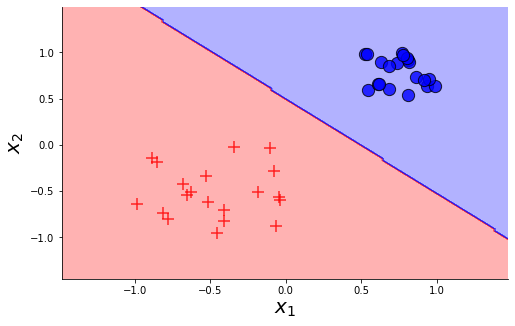

In [36]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
plot_decision_regions(X, Y, lr, ax)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Question**: Quid des problèmes avec plus que 2 classes ?

### 2.B La régression linéaire

Soient $x_{1:n}, y_{1:n} \sim X, Y$ un échantillon i.i.d d'observations de $X \in \mathbb{R}^p, Y \in \mathbb{R}$.

__Exemple__
On mesure les données d'expresssion sur $n$ patients et $p$ gènes. Chaque patient à un taux de réponse au traitement quantifiable par une variable continue.

***
La régression linéaire est un modèle de régression, i.e un modèle statistique sur la loi de $Y$ conditionnellement à $X$.

\begin{equation*}
    \mathcal{M}_{\Theta} = \{ P_{Y|X=x} = \mathcal{N}(x^\top \beta, \sigma^2) | \beta \in \mathbb{R}^p, \sigma^2 \in \mathbb{R}_+\}
\end{equation*}

Autrement dit, à $X_i$ fixé, $Y_i$ est tiré d'une loi de Normale de paramètre $\mu_i = x_i^\top \beta$ et de variance $\sigma^2$.

\begin{equation}
     Y_i \sim X_i ^\top \beta + \epsilon
\end{equation}
***

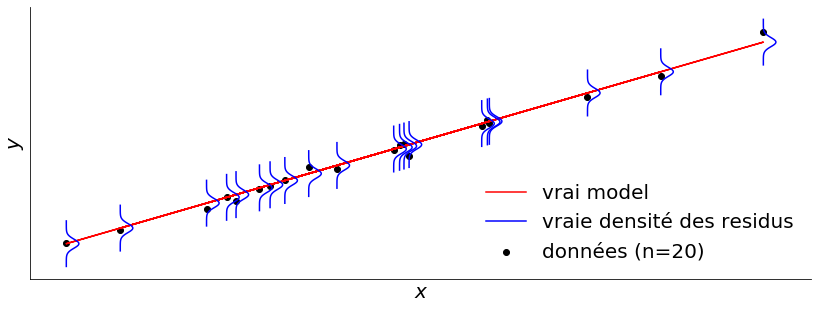

In [58]:
plot_illustrate_linear()

__En résumé__
1. Les paramètres du modèle à estimer sont $\theta = (\beta_1, \ldots, \beta_p, \sigma^2)$.
2. C'est un modèle statistique $\mathcal{M}_{\theta}$ sur la loi $P_{\mathrm{Y}|\mathrm{X}=\mathbf{x}}$ à $x$ fixé.
3. Hypothèses du modèle
    1. Relation linéaire entre $E[Y]$ et $x$ à $x$ fixé;
    2. La variance de $Y$ à $x$ fixé est indépendente de $x$ (homoscédasticité).

### Estimation de $\theta = (\beta_1, \ldots, \beta_p, \sigma^2)$

Par maximum de vraisemblance,
  \begin{align}
    \mathcal{L}(\beta, \sigma^2; \mathbf{x_{1:n}}, \mathbf{y_{1:n}}) &= \prod_{i=1}^n p_{\mathrm{Y_i|X_i}=\mathbf{x_i}}(y_i) \\
    & = \prod_{i=1}^n \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{1}{2\sigma^2} (y_i - \mathbf{x_i}^\top \beta)^2}
  \end{align}

On calcule l'estimateur $\hat{\beta}(\mathbf{X_{1:n}, Y_{1:n}})$ de $\beta^*$ par MV en minimisant $\ell(\beta, \sigma^2) = - \log \mathcal{L}(\beta, \sigma^2)$. Au minimu, les dérivées $\frac{\partial \ell}{\partial \beta}$ et $\frac{\partial \ell}{\partial \sigma^2}$ sont nulles. Tous calculs faits, et si $\mathbf{X_{1:n}^\top X_{1:n}}$ inversible,

\begin{equation}
    \hat{\beta}(\mathbf{X_{1:n}, Y_{1:n}}) = {\left(\mathbf{X_{1:n}^\top X_{1:n}}\right)}^{-1}\mathbf{X_{1:n}^\top Y_{1:n}}
\end{equation}
  
Cette dernière équation est appelée équation normale.

La variance du modèle $\sigma^2$ peut également être estimée par MV ce qui donne

\begin{equation}
  \hat{\sigma^2}(\mathbf{X_{1:n}, Y_{1:n}}) = \frac{1}{n} \sum_{i=1}^n (y_i - x_i^\top \hat{\beta})^2
\end{equation}

## 3. Modèles de survie

__Notations__

1. $\mathrm{T_D, T_C}$ variable aléatoires positives, temps à l'évènement et temps à la censure respectivement;
2. $\Delta$ variable aléatoire binaire indiquant l'occurrence de l'évènement;
3. $\mathrm{T} = \min (\mathrm{T_D, T_C})$ variable aléatoire observée;
4. $\mathbf{Z}$ vecteur aléatoire des covariables;

### 3.1 Modèles à risques proportionnels de Cox

__Definition 3__ (Fonction de survie)

La fonction de survie est donnée par
\begin{equation}
    S\colon
    \begin{array}{>{\displaystyle}c @{} >{{}}c<{{}} @{} >{\displaystyle}l}
      \mathbb{R}_{+} &\rightarrow& [0,1] \\ 
      t &\mapsto& \Pr(\mathrm{T_D} \geq t),
    \end{array}
\end{equation}

__Définition 4__ (Taux de risque)

La taux de risque (instantané) est la fonction donnée par

\begin{equation}
  \lambda\colon
  \begin{array}{>{\displaystyle}c @{} >{{}}c<{{}} @{} >{\displaystyle}l}
    \mathbb{R}_{+} &\rightarrow& \mathbb{R}_{+} \\ 
    t &\mapsto& \lim_{h \to 0} \Pr(\mathrm{T_D} \leq t+h| \mathrm{T_D} \geq t).
  \end{array}
\end{equation}

*Soit* $f_D$ (resp $F_D$) densité (resp f.r.) de $\mathrm{T_D}$. Alors
\begin{align}
\lambda(t) &= \frac{f_D(t)}{1-F_D(t)} \\ 
& = \frac{-S'(t)}{S(t)} \\
\text{d'où} \qquad \int_{0}^t \lambda(s)ds & = - \log(S(t)) \quad (\text{car $S(0)$=1})
\end{align}

\begin{equation}
    S(t) = e^{-\Lambda(t)}
\end{equation}

**Observations**

Supposons que l'on mesure pour $n$ patients l'observation d'un évènement $\delta_{1:n}$, la date de l'évènement $t_{1:n}$ et des covariables $\mathbf{z_{1:n}}$, formant ainsi un $n$-échantillon de $\Delta_{1:n}, \mathrm{T}_{1:n}, \mathbf{Z_{1:n}}$.

***
**Le modèle**

Le modèle de Cox modélise $\mathrm{T_{D,1:n}}$, à $\mathrm{z_{1:n}}$ fixés, via le taux de risque selon la relation 

\begin{equation}
\lambda_i(t) = \lambda_0(t) e^{\mathrm{z_i}^\top\beta}
\end{equation}

***

**Hypothèses du modèle**

1. *Proportionnalité* Question: Pourquoi parle-t-on de ``risques proportionnels''?
Supposons $\mathbf{z}=1$ pour le groupe traité et $\mathbf{z}=0$ pour le groupe de contrôle.
  Alors,
  \begin{equation}
    \forall t \geq 0, \qquad \frac{\lambda(t,1)}{\lambda(t, 0)} = \frac{\lambda_0(t)e^{\beta}}{\lambda_0(t)} = 
    e^{\beta}
  \end{equation}

2. *Linéarité* entre $\log(\lambda_i)$ et les covariables $\mathbf{z_i}$.

### 3.2 Estimation des paramètres du modèle de Cox.

À nouveau on procède par maximum de vraisemblance. Pour cela, calculons la vraisemblance du $n$-échantillon des observations.

Pour chaque patient $i$ d'observation $\Delta_i, t_i, z_i$ la vraisemblance (=probabilité) associée à l'échantillon $i$ sous le modèle proposé est

1. Si $\Delta_i=0$, i.e le patient n'a pas eu d'évènement (censuré à droite donc), on a 
\begin{equation}
\Pr(\mathrm{T_i} = t_i | \Delta_i = 0) = \Pr(\mathrm{T_{D,i}} \geq t_i) = \mathcal{S}_i(t_i)
\end{equation}

2. Si $\Delta_i=1$, i.e le patient a subi un évènement, on a 
\begin{equation}
\Pr(\mathrm{T_i} = t_i | \Delta_i = 1) = \Pr(\mathrm{T_{D,i}} = t_i) = \lambda_i(t_i) \mathcal{S}_i(t_i)
\end{equation}

Alors,

\begin{align*}
\mathcal{L}(\beta; \mathbf{\delta_{1:n}}, \mathbf{t_{1:n}}, \mathbf{z_{1:n}}) &= \prod_{i=1}^n \lambda(t_i)^{\delta_i} 
S_i(t_i) \\
& = \prod_{i=1}^n \left[ \frac{\lambda_i(t_i)}{\sum_{j \in R(t_i)} \lambda_j(t_j)} \right]^{\delta_i} [\sum_{j \in 
R(t_i)} \lambda_j(t_i)]^{\delta_i} S_i(t_i)\\
& = \prod_{i=1}^n \left[ \frac{\lambda_0(t_i) e^{z_i^\top \beta} }{\sum_{j \in R(t_i)} \lambda_0(t_i) e^{z_j^\top 
\beta}} \right]^{\delta_i} [\sum_{j \in R(t_i)} \lambda_j(t_j)]^{\delta_i} S_i(t_i)
\end{align*}

avec $\mathcal{R}(t_i)$ l'ensemble des individus encore à risque au temps $t_i$ (i.e ceux censurés ou ayant subi un évènement à un temps $t \geq t_i$).

Dans son papier originel (Cox. Regression Models and Life-Tables. Journal of the Royal Statistical Society, 1972), Cox argumente que l'ensemble de l'information nécessaire pour estimer $\beta$ est contenu dans la **vraisemblance partielle** définie comme suite

\begin{equation}
\mathcal{L}_{\mathrm{partiel}}(\beta) = \prod_{i=1}^n \left[ \frac{\lambda_0(t_i) e^{z_i^\top \beta} }{\sum_{j \in 
R(t_i)} \lambda_0(t_i) e^{z_j^\top \beta}} \right]^{\delta_i}
\end{equation}

de sorte que l'estimateur de $\beta^*$ est donné
\begin{equation}
\widehat{\beta}(\mathbf{z_{1:n}}, \mathbf{t_{1:n}}, \mathbf{\delta_{1:n}}) \in \underset{\beta}{\mathrm{argmax}} \:  \mathcal{L}_{\mathrm{partiel}}(\beta)
\end{equation}

__Remarque__: Le modèle de Cox dépend également de la fonction $\lambda_0$ qui n'a pas besoin d'être estimée pour comparer des patients. Puisque seule une partie des paramètres est estimée, on parle de modèle **semi-paramétrique**.

**Exemple**

In [66]:
df = pd.DataFrame({"individual": [1,2,3,4], "T": [9,8,6,10], "delta": [1,0,1,1], "Z": [4,5,7,3]})
df = df.set_index("individual")

In [67]:
df

,T,delta,Z
individual,,,
1,9,1,4
2,8,0,5
3,6,1,7
4,10,1,3


**Contribution au temps $t_1=6$**
$\mathcal{R}(t_1) = \{1,2,3,4\}$ donnant lieu au terme
\begin{equation}
\frac{e^{7 \beta} }{e^{4\beta} + e^{5\beta} + e^{7\beta} + e^{3\beta}}
\end{equation}

**Contribution au temps $t_2=8$**
$\mathcal{R}(t_2) = \{1,2,4\}$ donnant lieu au terme
\begin{equation}
1
\end{equation}

**Contribution au temps $t_3=9$**
$\mathcal{R}(t_1) = \{1,4\}$ donnant lieu au terme
\begin{equation}
\frac{e^{4 \beta} }{e^{4\beta} + e^{3\beta}}
\end{equation}

**Contribution au temps $t_4=10$**
$\mathcal{R}(t_1) = \{1,4\}$ donnant lieu au terme
\begin{equation}
\frac{e^{3 \beta} }{e^{3\beta}} = 1
\end{equation}

## Merci de votre attention